# ROC Curves and the Area Under Curve (AUC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HelpfulFunctions as hp
import pandas as pd

plt.style.use('seaborn')
%matplotlib inline

In [2]:
def plotROCCurve(fpr_v,tpr_v):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_v, tpr_v)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')

## Load Iris Dataset

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data)

In [5]:
df.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']

We wish to use Logistic Regression to determine whether a given Iris is a Virginica or not

In [6]:
y = iris.target

In [7]:
# Create labels of 1 for virginica and 0 otherwise
y = (np.array(y)==2).astype(np.int)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression()

# Generating The ROC Curve

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

### One Feature

In [11]:
X = df[['sepalLength']]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=101)

(150, 1)


AUC: 0.894620811287

[[53  1]
 [14  7]]


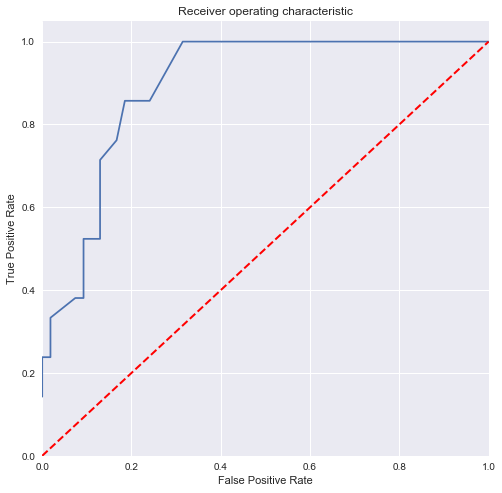

In [12]:
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plotROCCurve(fpr,tpr)
area = auc(fpr,tpr)
print("AUC:", area)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print(cm)

In [13]:
X = df[['petalWidth']]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=101)

(150, 1)


AUC: 0.989417989418

[[45  9]
 [ 1 20]]


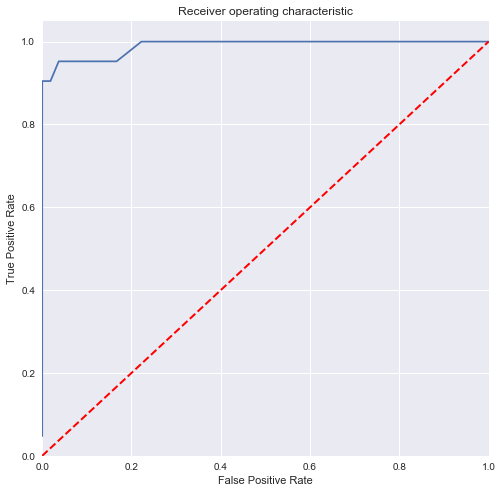

In [14]:
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plotROCCurve(fpr,tpr)
area = auc(fpr,tpr)
print("AUC:", area)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print(cm)

### Two Features

In [15]:
X = df[['petalWidth','sepalLength']]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=101)

(150, 2)


AUC: 0.978395061728

[[48  6]
 [ 2 19]]


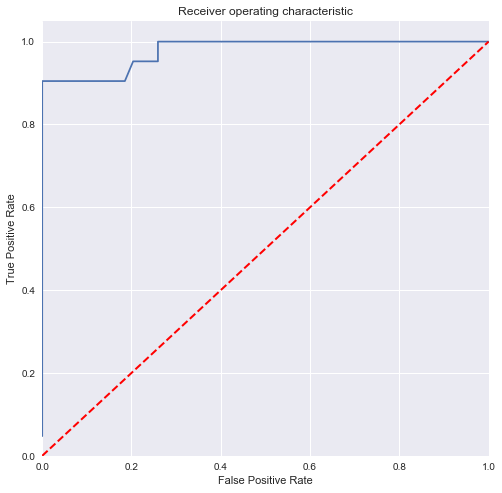

In [16]:
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plotROCCurve(fpr,tpr)
area = auc(fpr,tpr)
print("AUC:", area)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print(cm)

### All Features

In [17]:
X = pd.DataFrame(iris.data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=101)

In [18]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

AUC: 1.0

[[52  2]
 [ 0 21]]


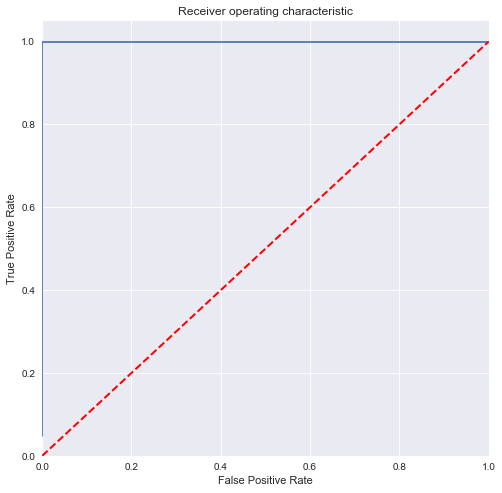

In [19]:
y_score = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plotROCCurve(fpr,tpr)
area = auc(fpr,tpr)
print("AUC:", area)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print(cm)

## A Larger Dataset - ROC for a Moons Dataset Classifier

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [45]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.15)

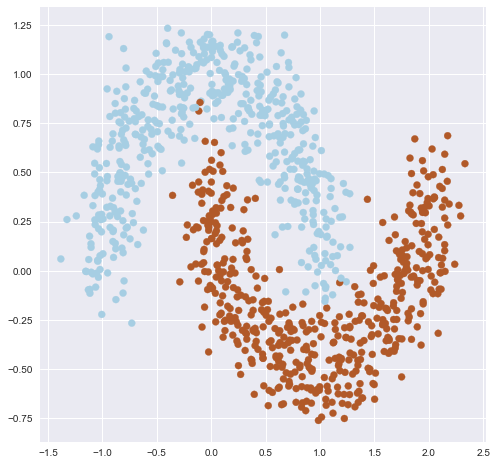

In [46]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

AUC: 0.95375928149

[[127  20]
 [ 20 133]]


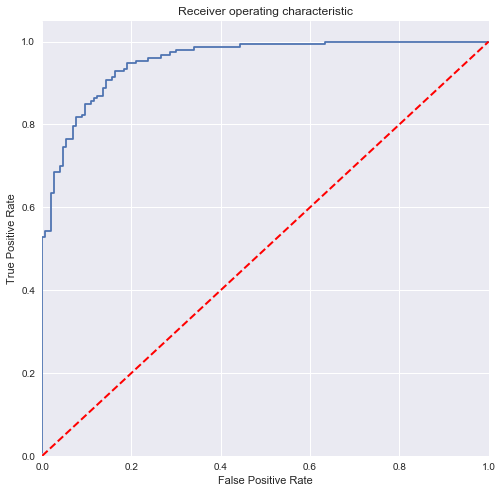

In [51]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plotROCCurve(fpr,tpr)
area = auc(fpr,tpr)
print("AUC:", area)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print(cm)

AUC: 0.997643501845

[[141   6]
 [  2 151]]


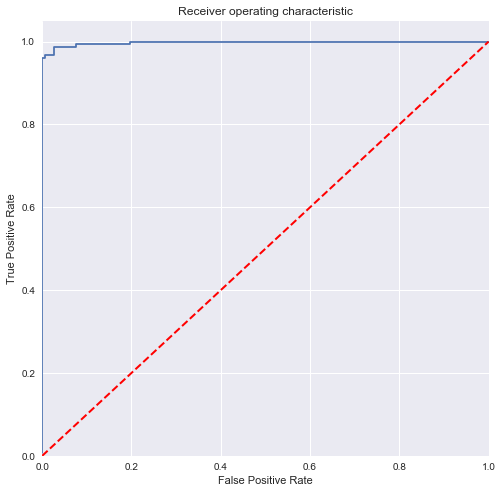

In [52]:
clf = SVC()
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plotROCCurve(fpr,tpr)
area = auc(fpr,tpr)
print("AUC:", area)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print(cm)